In [1]:
import pandas as pd
import numpy as np

### Pandas introduction

The data: https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv

In [2]:
students_performance = pd.read_csv('StudentsPerformance.csv')
students_performance.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [3]:
students_performance.describe()  # basic stats for the table

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
students_performance.dtypes  # data types in the table

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
students_performance.shape

(1000, 8)

In [6]:
students_performance.groupby('gender').aggregate({'writing score': 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [7]:
students_performance.size

8000

In [8]:
students_performance.iloc[0:5, 0:3]  # by index

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [9]:
students_performance.iloc[[0, 3, 10], [0, 5, -1]]

,gender,math score,writing score
0,female,72,74
3,male,47,44
10,male,58,52


In [10]:
students_performance.loc[[0, 3, 10], ['gender', 'math score', 'writing score']]  # by label

,gender,math score,writing score
0,female,72,74
3,male,47,44
10,male,58,52


In [11]:
students_performance.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [12]:
students_performance.select_dtypes(include='int64').head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [13]:
students_performance.index

RangeIndex(start=0, stop=1000, step=1)

In [14]:
students_performance_with_names = students_performance.iloc[[0, 3, 4, 7, 8]]
students_performance_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']
students_performance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [15]:
students_performance_with_names.index

Index(['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne'], dtype='object')

In [16]:
students_performance_with_names.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']]

,gender,writing score
Cersei,female,74
Joffrey,male,39


In [17]:
students_performance_with_names.iloc[:, 0]

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [18]:
type(students_performance_with_names.iloc[:, 0])

pandas.core.series.Series

In [19]:
pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [20]:
my_series_1 = pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])
my_series_2 = pd.Series([4, 5, 6], index=['Cersei', 'Tywin', 'Gregor'])
pd.DataFrame({'col_name_1': my_series_1, 'col_name_2': my_series_2})

,col_name_1,col_name_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


In [21]:
# task
titanic_dataset = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
print(titanic_dataset.shape)
titanic_dataset.dtypes.value_counts()

(891, 12)


object     5
int64      5
float64    2
dtype: int64

### Data filtering

In [22]:
students_performance.loc[students_performance.gender == 'female']  # Boolean array as input to loc

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [23]:
mean_writing_score = students_performance['writing score'].mean()
students_performance[(students_performance['writing score'] > mean_writing_score) & \
                     (students_performance.gender == 'female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [24]:
# task
sum(students_performance.lunch == 'free/reduced') / students_performance.shape[0]

0.355

In [25]:
# task
print(students_performance.groupby(by='lunch').mean())
print(students_performance.groupby(by='lunch').var())

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256
              math score  reading score  writing score
lunch                                                 
free/reduced  229.824270     221.871139     238.202881
standard      186.418089     191.285560     205.620887


In [26]:
students_performance = students_performance \
    .rename(columns = {
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})

In [27]:
students_performance.columns = [x.replace(' ', '_') for x in students_performance.columns]  # the same

In [28]:
writing_score_query = 78
students_performance.query('gender == "female" & writing_score > @writing_score_query')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [29]:
# Pythonic method of choosing the columns
score_columns = [i for i in list(students_performance) if 'score' in i]
students_performance[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [30]:
# Pandas-like method of choosing the columns
students_performance.filter(like='score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [31]:
students_performance_with_names.filter(like='e', axis=0)  # by rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


### Grouping and aggregation

In [32]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
students_performance.groupby('gender', as_index=False) \
    .aggregate({'math_score': ['mean', 'max', 'min'], 'reading_score': 'mean'})

gender math_score          reading_score
                mean  max min          mean
0  female  63.633205  100   0     72.608108
1    male  68.728216  100  27     65.473029

In [34]:
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns = {'math_score': 'mean_math_score', 'reading_score': 'mean_reading_score'})
mean_scores.loc[[('female', 'group A'), ('female', 'group B')]]

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923

In [35]:
students_performance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [36]:
students_performance.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [37]:
students_performance = students_performance.assign(total_score = \
                                                  students_performance.math_score + \
                                                  students_performance.reading_score + \
                                                  students_performance.writing_score)
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [38]:
students_performance.drop(['total_score'], axis=1).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722


In [39]:
# task
dota2_heroes_number_of_legs = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)
dota2_heroes_number_of_legs.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [40]:
# task
dota2_heroes_number_of_legs.groupby('legs').count()

,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,
0,11,11,11,11,11,11
2,95,95,95,95,95,95
4,7,7,7,7,7,7
6,3,3,3,3,3,3
8,1,1,1,1,1,1


In [41]:
# task
salary_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
salary_data.sort_values(by='Salary', ascending=False).groupby(['Type', 'Executor']).mean()

Unnamed: 0      Salary
Type Executor                        
A    Loopa      46.000000   58.000000
     Pupa       16.000000  160.833333
B    Loopa      24.000000  145.166667
     Pupa       41.000000   77.000000
C    Loopa      31.666667  154.333333
     Pupa       23.000000   74.500000
D    Loopa      31.857143  137.714286
     Pupa       14.000000  146.500000
E    Loopa      23.500000  164.000000
     Pupa       19.800000  131.200000
F    Loopa      20.000000  238.000000
     Pupa       25.750000  136.250000

In [42]:
# task
dota2_heroes_number_of_legs.groupby(['attack_type', 'primary_attr']).count()

id  legs  localized_name  name  roles
attack_type primary_attr                                       
Melee       agi           19    19              19    19     19
            int            2     2               2     2      2
            str           35    35              35    35     35
Ranged      agi           18    18              18    18     18
            int           40    40              40    40     40
            str            3     3               3     3      3

In [43]:
# task
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
mean_concentrations = concentrations.groupby('genus').mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [44]:
# task
concentrations[concentrations.genus == 'Fucus'].alanin.describe()

count    3.000000
mean     3.566411
std      3.149943
min      0.346431
25%      2.028965
50%      3.711498
75%      5.176401
max      6.641303
Name: alanin, dtype: float64

In [45]:
# task
concentrations.groupby('group').describe()

sucrose                                                             \
        count      mean       std       min       25%      50%       75%   
group                                                                      
brown     6.0  4.709666  2.336471  1.636122  3.070321  5.00397  6.773014   
green     3.0  4.008792  1.634817  2.452623  3.157047  3.86147  4.786877   
red       1.0  0.704580       NaN  0.704580  0.704580  0.70458  0.704580   

                alanin            ...   glucose           oleic_acid  \
            max  count      mean  ...       75%       max      count   
group                             ...                                  
brown  6.825467    6.0  3.103846  ...  3.866782  6.013219        6.0   
green  5.712284    3.0  3.997055  ...  3.041936  3.343707        3.0   
red    0.704580    1.0  3.176440  ...  3.242090  3.242090        1.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
group                                                                        
brown  3.584995  2.094095  0.304573  2.672695  3.774952  4.652528  6.405165  
green  2.263472  0.735111  1.432514  1.980700  2.528886  2.678951  2.829016  
red    2.245538       NaN  2.245538  2.245538  2.245538  2.245538  2.245538  

[3 rows x 40 columns]

### Visualization

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

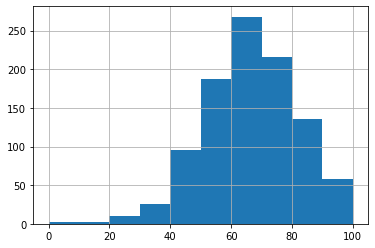

In [47]:
students_performance.math_score.hist()

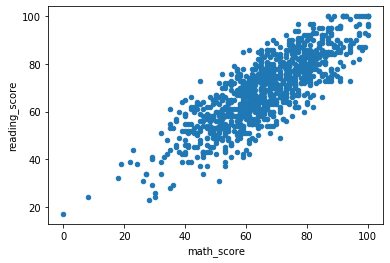

In [48]:
students_performance.plot.scatter(x='math_score', y='reading_score')

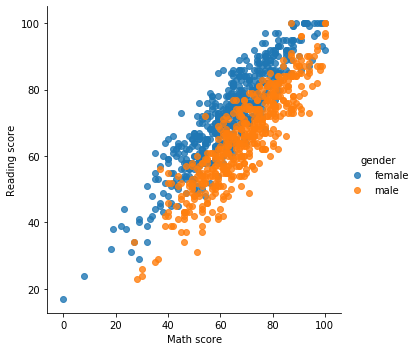

In [49]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender',
                data=students_performance, 
                fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

### Visualization tasks

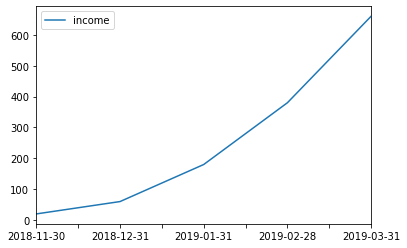

In [50]:
income = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
income.plot()

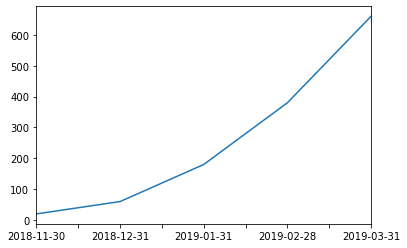

In [51]:
income['income'].plot()

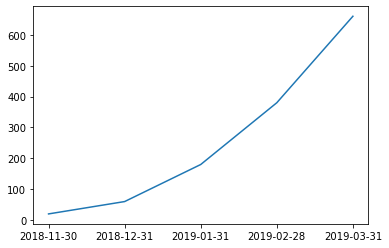

In [52]:
plt.plot(income.index, income.income)

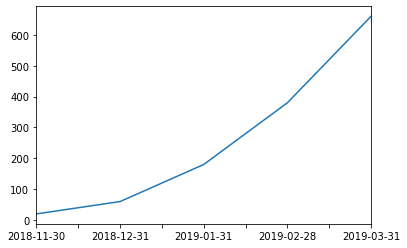

In [53]:
income.income.plot()

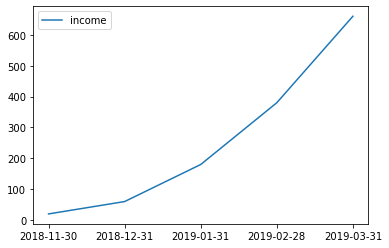

In [54]:
sns.lineplot(data=income)

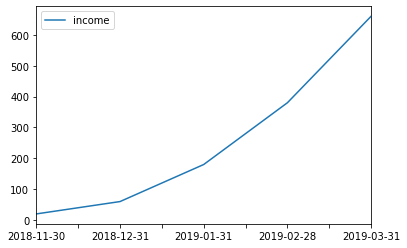

In [55]:
income.plot(kind='line')

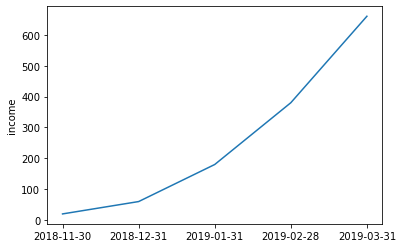

In [56]:
sns.lineplot(x=income.index, y=income.income)

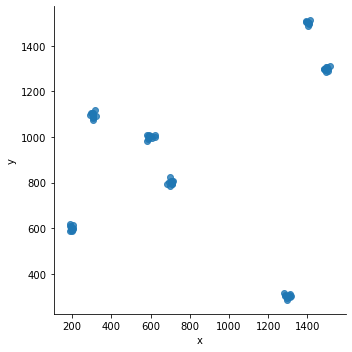

In [57]:
df = pd.read_csv('/home/leo/Downloads/dataset_209770_6.txt', sep=' ')
sns.lmplot(x='x', y='y', data=df, fit_reg=False)

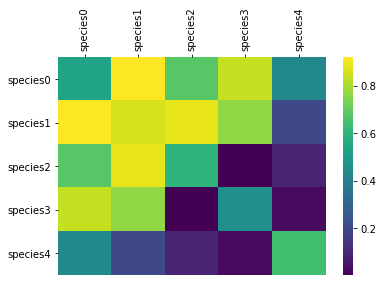

In [58]:
genome_distances = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
g = sns.heatmap(genome_distances, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [59]:
dota2_heroes = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col = 0)

In [60]:
dota2_heroes.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [61]:
dota2_heroes.dtypes

attack_type       object
id                 int64
legs               int64
localized_name    object
name              object
primary_attr      object
roles             object
dtype: object

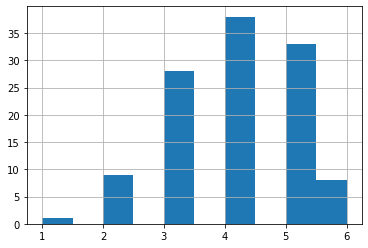

In [62]:
dota2_heroes = dota2_heroes.assign(
    number_of_roles = list(map(lambda s: len(eval(s)), dota2_heroes.roles))
)
dota2_heroes.number_of_roles.hist()

In [63]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)

In [64]:
iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int64
dtype: object

In [65]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


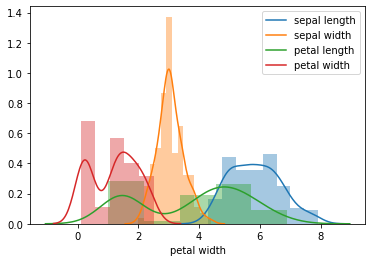

In [66]:
for col in iris:
    if col == 'species':
        continue
    sns.distplot(iris[col], kde_kws={'label': col})

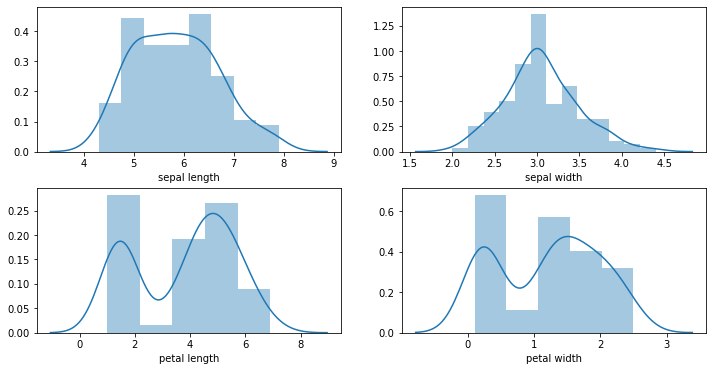

In [67]:
fig = plt.figure(figsize=(12, 6))
i = 0
for col in iris:
    i += 1
    if col == 'species':
        continue
    ax = fig.add_subplot(2, 2, i)
    sns.distplot(iris[col])
fig.subplots_adjust(hspace=0.25)

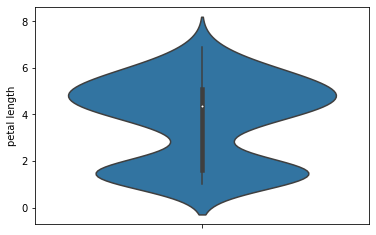

In [68]:
sns.violinplot(iris['petal length'], orient='v')

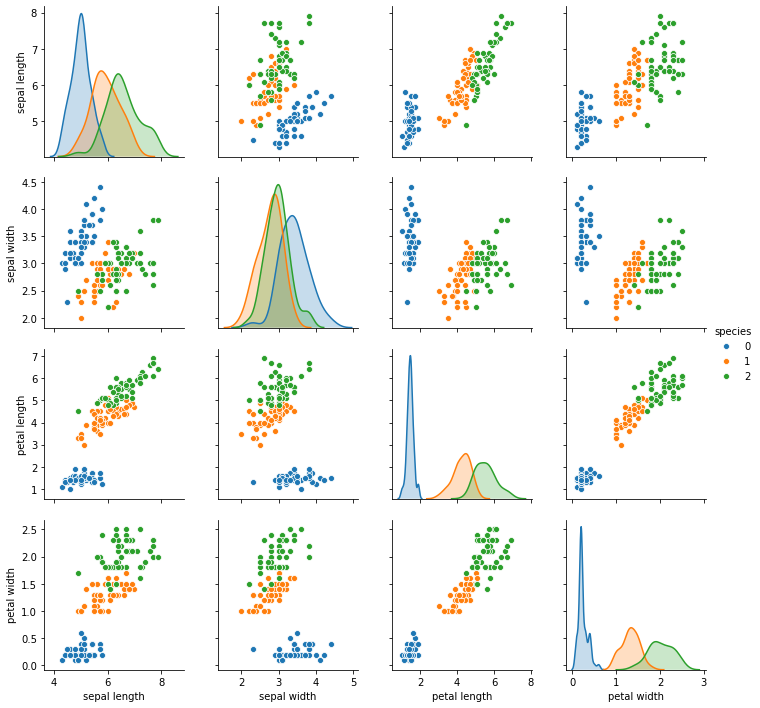

In [69]:
sns.pairplot(iris, hue='species', vars=[col for col in iris if col != 'species'])

### Practical tasks

In [70]:
my_data = pd.DataFrame(data={'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [71]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.iloc[~my_stat.index.isin((0, 4)), [1, 3]]

In [72]:
subset_1 = my_stat[(my_stat.V1 > 0) & (my_stat.V3 == 'A')]
subset_2 = my_stat[(my_stat.V2 != 10) | (my_stat.V4 >= 1)]

In [73]:
my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat['V6'] = np.log(my_stat.V2)

In [74]:
my_stat = my_stat.drop(['V5', 'V6'], axis=1)

In [75]:
my_stat.columns = ['session_value', 'group', 'time', 'n_users']
my_stat.head()

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [76]:
my_stat_na = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_na.csv')

In [77]:
my_stat_na.session_value = my_stat_na.session_value.fillna(0)

In [78]:
my_stat_na.loc[my_stat_na.n_users < 0, 'n_users'] = my_stat_na[my_stat_na.n_users >= 0].n_users.median()

In [79]:
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}) \
    .rename(columns={'session_value': 'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,5.0,0.000000
1,7.0,0.333333
2,8.0,0.633333
3,9.0,0.238938
4,10.0,0.065990
5,11.0,-0.081081
6,12.0,-0.078947
7,13.0,0.000000
